# **Predictive Analytics Energy Consumption**

#Import Library

In [323]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

# Data Loading

In [324]:
train_url = 'https://raw.githubusercontent.com/abdul-rar/proyek_mlt_1/refs/heads/main/dataset/train_energy_data.csv'
train_data = pd.read_csv(train_url)
train_data.head(10)

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17
5,Commercial,37377,26,32,16.24,Weekend,4687.67
6,Industrial,38638,92,14,21.01,Weekend,5526.83
7,Residential,34950,60,18,28.24,Weekday,4116.32
8,Industrial,29741,99,44,13.08,Weekday,5841.65
9,Residential,17467,42,36,28.84,Weekday,3419.13


In [325]:
test_url = 'https://raw.githubusercontent.com/abdul-rar/proyek_mlt_1/refs/heads/main/dataset/test_energy_data.csv'
test_data = pd.read_csv(test_url)
test_data.head(10)

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59
5,Industrial,31207,47,28,22.82,Weekday,5026.23
6,Residential,39227,18,44,23.36,Weekend,4404.56
7,Residential,7814,21,19,27.27,Weekday,2394.37
8,Industrial,20482,24,16,23.00,Weekend,3969.09
9,Industrial,21030,90,35,12.96,Weekday,5136.69


In [326]:
combined_df = pd.concat([train_data, test_data], axis=0).reset_index(drop=True)
combined_df.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17


# Exploratory Data Analysis (EDA)

## Deskripsi Variabel

Berdasarkan informasi dari sumber dataset, yaitu kaggle, variabel-variabel pada energy consumption dataset adalah:

- Building Type: fitur kategorikal yang merepresentasikan tipe bangunan
- Square Footage: fitur numerikan yang merepresentasikan luas bangunan dalam kaki(feet) persegi
- Number of Occupants: fitur numerik yang mengindikasikan berapa orang yang menempati bangunan tersebut
- Appliance Used: fitur numerik yang menunjukan berapa perangkat atau peralatan yang membutuhkan energi pada bangunan
- Average Temprature: fitur numerik yang menunjukan rata-rata teperatur atau suhu dari bangunan atau area iklim dengan satuan celcius
- Day of Week: fitur karegorik yang merepresentasikan data diambil pada weekend atau weekday
- Energy Consumption: fitur target berupa numerik yang merepresentasikan konsumsi energi dari bangunan dalam kWh (kilowatt-hours)

## Cek Value dan Data Cleaning

Pada tahap ini dilakukan pengecekan apakah ada missing value, duplicate, outlier, dan ketidaksesuaian tipe data

In [327]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1100 non-null   object 
 1   Square Footage       1100 non-null   int64  
 2   Number of Occupants  1100 non-null   int64  
 3   Appliances Used      1100 non-null   int64  
 4   Average Temperature  1100 non-null   float64
 5   Day of Week          1100 non-null   object 
 6   Energy Consumption   1100 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 60.3+ KB


In [328]:
combined_df.describe()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,25500.527273,48.268182,25.730000,22.559745,4168.191273
std,14236.955632,29.127624,14.116209,7.122357,924.278723
min,560.000000,1.000000,1.000000,10.050000,1683.950000
25%,13203.750000,22.000000,13.000000,16.365000,3510.460000
50%,25785.500000,47.000000,26.000000,22.810000,4189.690000
75%,37536.750000,73.000000,38.000000,28.760000,4859.510000
max,49997.000000,99.000000,49.000000,34.990000,6530.600000


In [329]:
combined_df.duplicated().sum()

np.int64(0)

Pada dataset tidak ada missing value dan duplicate. Selanjutnya cek outlier

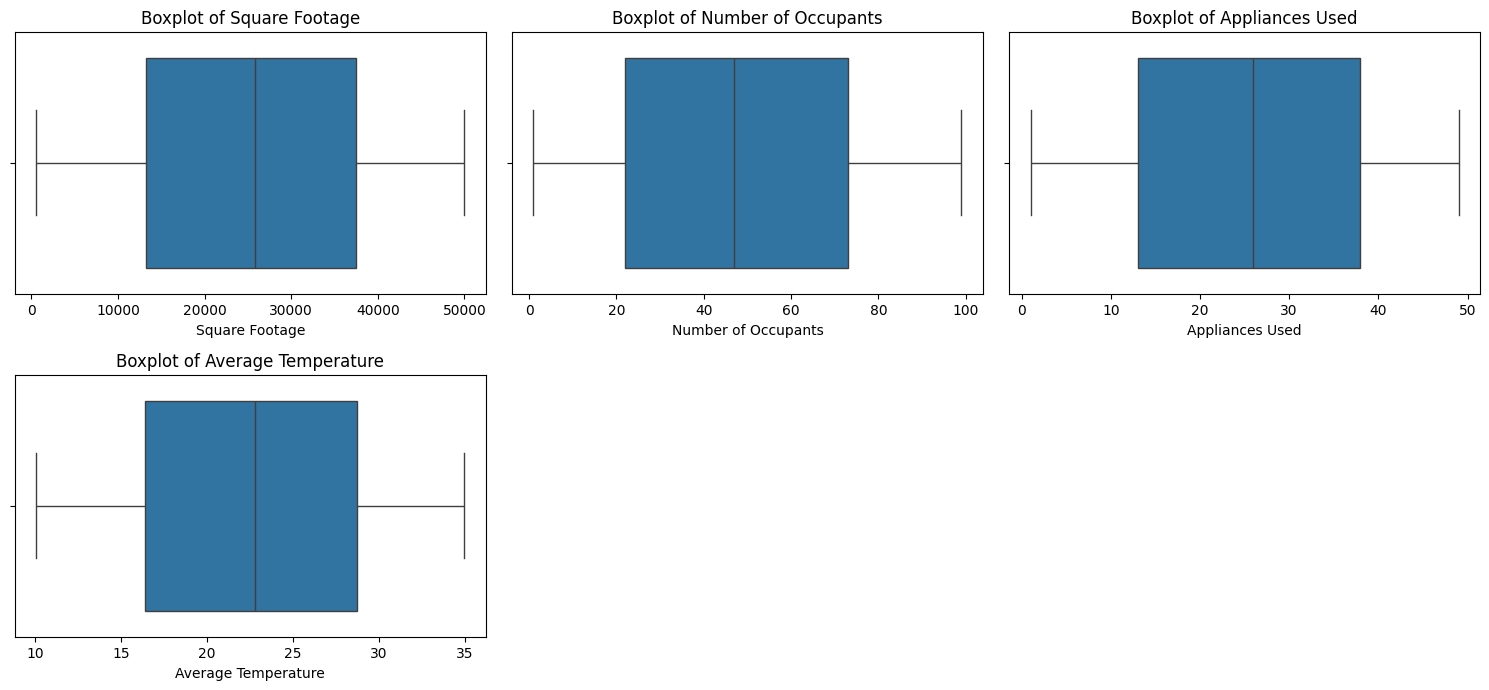

In [330]:
# Pilih fitur numerik
numeric_cols = ['Square Footage', 'Number of Occupants', 'Appliances Used', 'Average Temperature']

# Ukuran plot
plt.figure(figsize=(15, 10))

# Loop dan buat boxplot
for i, feature in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=combined_df[feature])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

Tidak ada outliers juga pada data

## Univariate Analysis

Pada bagian ini akan menganalisis setiap fitur pada dataset secara satu persatu

In [331]:
numerical_features = ['Square Footage', 'Number of Occupants', 'Appliances Used', 'Average Temperature', 'Energy Consumption']
categorical_features = ['Building Type', 'Day of Week']

### Categorical Features

               jumlah sampel  persentase
Building Type                           
Residential              387        35.2
Commercial               362        32.9
Industrial               351        31.9


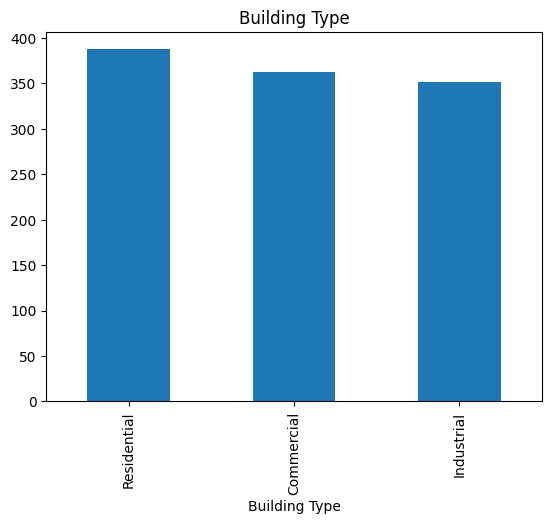

In [332]:
#Fitur Building Type
feature = categorical_features[0]
count = combined_df[feature].value_counts()
percent = 100*combined_df[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

             jumlah sampel  persentase
Day of Week                           
Weekday                551        50.1
Weekend                549        49.9


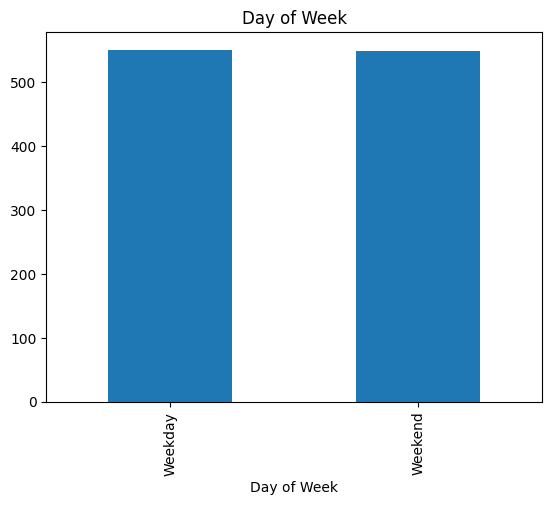

In [333]:
#Fitur Day of Week
feature = categorical_features[1]
count = combined_df[feature].value_counts()
percent = 100*combined_df[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Kedua fitur memiliki distribusi yang merata untuk setiap value nya,
- Redidential, Commercial, dan Industrial memiliki distribusi yang hampir merata
- Weekday dan Weekend memiliki distribusi yang hampir merata

### Numerical Features

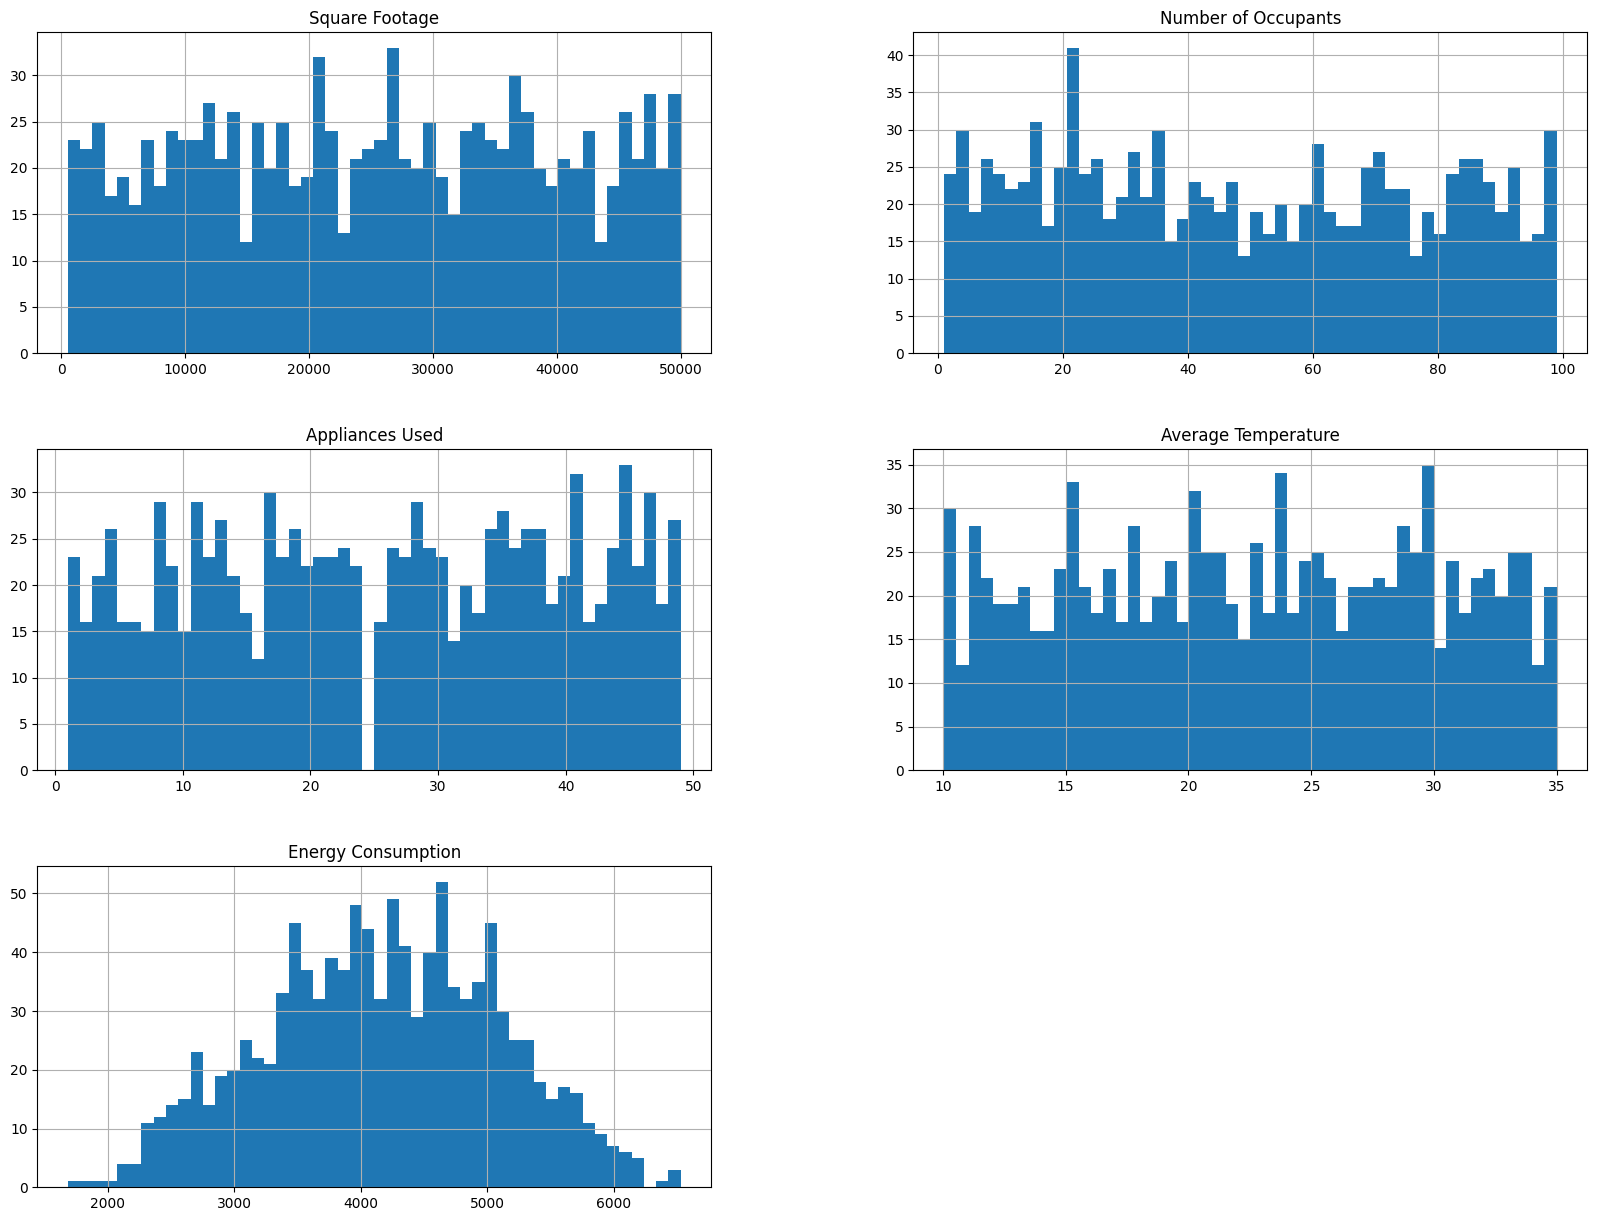

In [334]:
combined_df.hist(bins=50, figsize=(20,15))
plt.show()

- Energy consumption memiliki distribusi yang hampir normal dengan nilai energy consumption yang ditengah-tengah memiliki sample yang banyak
- Energy consumption yang rendah dan tinggi memiliki sample yang sedikit
- Fitur lain memiliki distribusi yang beragam atau tidak mengikuti pola tertentu

## Multivariate Analysis

Menganalisis beberapa fitur atau untuk mengetahui hubungan antar fitur di dataset

<ipython-input-335-019c1e68fe82>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Energy Consumption", kind="bar", dodge=False, height = 4, aspect = 3,  data=combined_df, palette="Set3")
<ipython-input-335-019c1e68fe82>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Energy Consumption", kind="bar", dodge=False, height = 4, aspect = 3,  data=combined_df, palette="Set3")


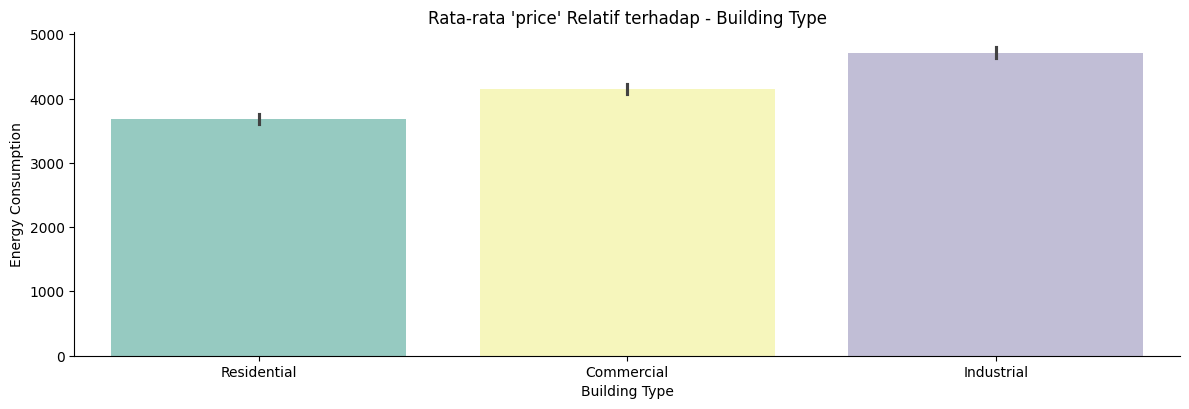

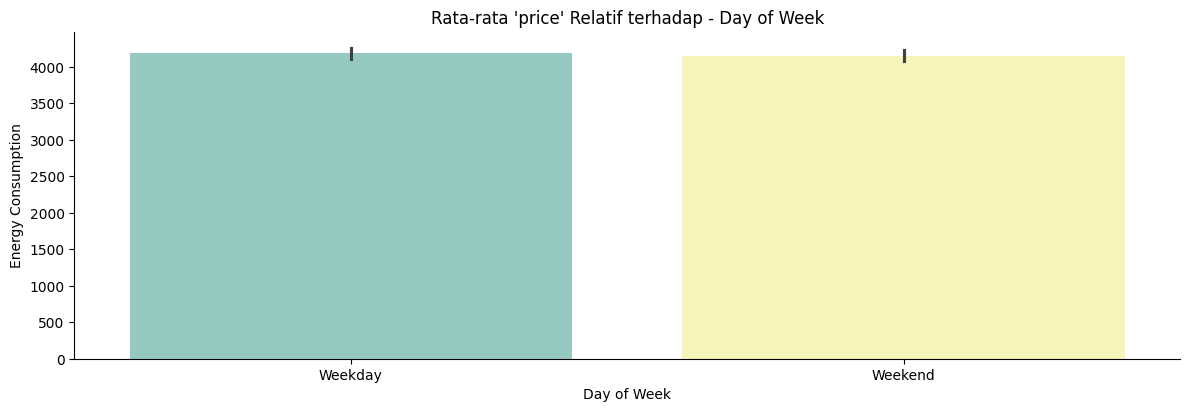

In [335]:
# Fitur Kategorikal
for col in categorical_features:
  sns.catplot(x=col, y="Energy Consumption", kind="bar", dodge=False, height = 4, aspect = 3,  data=combined_df, palette="Set3")
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

- Pada fitur "Type of Building", rata-rata energy consumption memiliki rentang diantara 3700 - 4700, dengan residential paling kecil, disusul oleh commercial, lalu industrial
- Pada fitur "Day of Week", rata-rata energy consumption memiliki nilai yang mirip, bahkan hampir sama untuk kedua jenis hari
- Dapat disimpulkan bahwa fitur "Type of Building" memiliki pengaruh yang kecil ke energy consumption sedangkan fitur "Day of Week" hampir tidak memiliki pengaruh

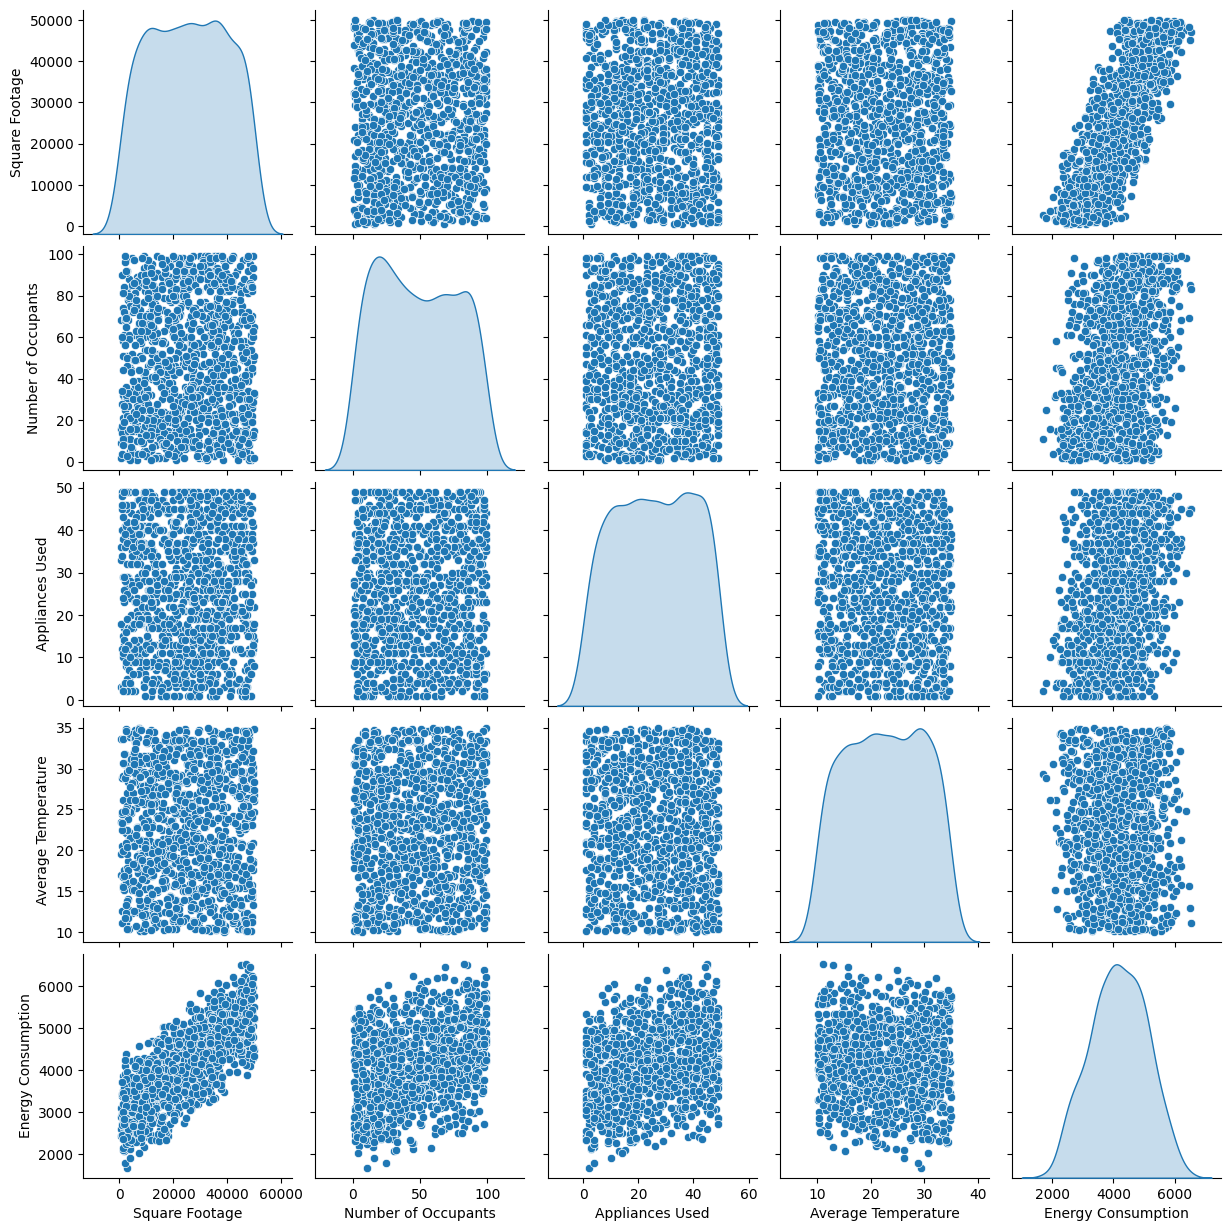

In [336]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(combined_df, diag_kind = 'kde')

Semua fitur numerik memiliki korelasi yang kecil dengan energy comsumption, yang terlihat memiliki korelasi yaitu square footage, lalu number of occupants dan appliances used, walaupun lebih kecil, dan average temperature yang korelasinya sangat kecil. Untuk lebih jelas mengevauasi skor korelasinya, gunakan fungsi corr()

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

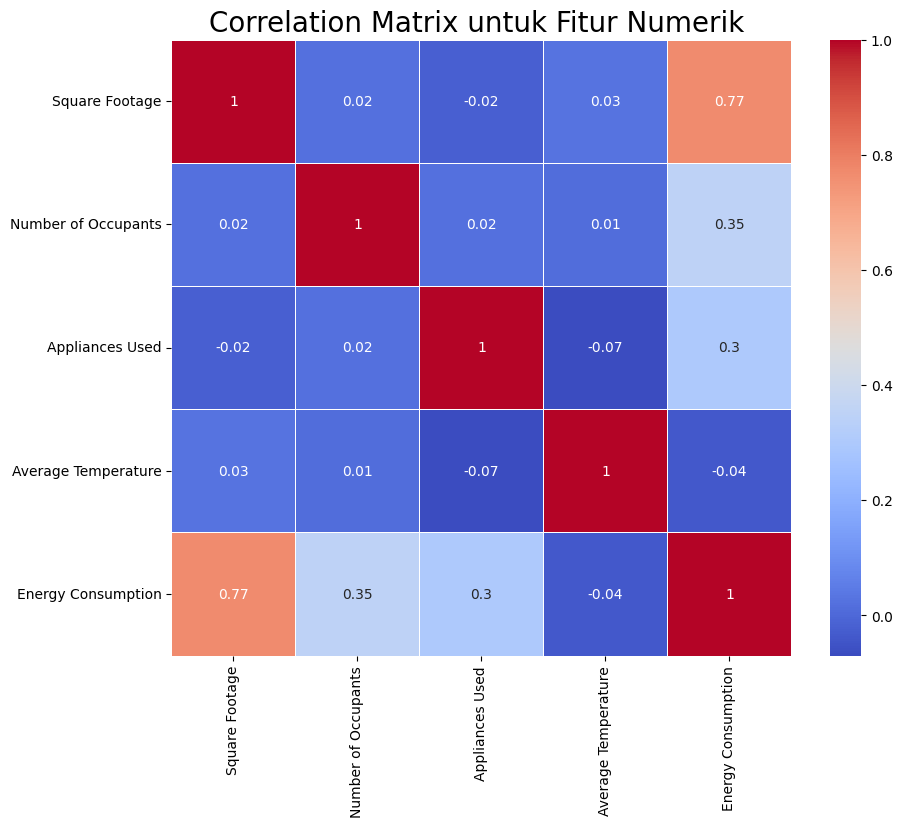

In [337]:
plt.figure(figsize=(10, 8))
correlation_matrix = combined_df[numerical_features].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

## Feature Selection

Dari univariate dan multivariate analysis yang telah dilakukan dapat disimpulkan bahwa fitur "Day of Week" dan "Average Temperature" memiliki korelasi yang kecil terhadap Energy Consumption, sehingga kedua fitur tersebut dapat dihapus

In [338]:
selected_df = combined_df.drop(columns=['Day of Week', 'Average Temperature'])
selected_df.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Energy Consumption
0,Residential,7063,76,10,2713.95
1,Commercial,44372,66,45,5744.99
2,Industrial,19255,37,17,4101.24
3,Residential,13265,14,41,3009.14
4,Commercial,13375,26,18,3279.17


#Data Preparation

Mempersiapkan data agar sesuai dengan model yang akan dibuat, akan dilakukan encoding untuk fitur kategorikal, data splitting menjadi train dan test, serta standarisasi fitur numerikal

## Encode Fitur Kategorikal

Komputer hanya bisa mengenali angka, maka dari itu perlu dilakukan encoding dari fitur kategorikal menjadi angka. Encoding yang digunakan disini adalah one hot encoding atau mengubah fitur kategorikal menjadi beberapa kolom yang akan berisi 0 atau 1 sesuai dengan nilai asal kolom kategorikal sebelumnya

In [339]:
encoded_df = combined_df.copy()
encoded_df = pd.concat([encoded_df, pd.get_dummies(encoded_df['Building Type'], prefix='Building Type')],axis=1)
encoded_df = pd.concat([encoded_df, pd.get_dummies(encoded_df['Day of Week'], prefix='Day of Week')],axis=1)
encoded_df.drop(['Building Type','Day of Week'], axis=1, inplace=True)
encoded_df.head()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption,Building Type_Commercial,Building Type_Industrial,Building Type_Residential,Day of Week_Weekday,Day of Week_Weekend
0,7063,76,10,29.84,2713.95,False,False,True,True,False
1,44372,66,45,16.72,5744.99,True,False,False,True,False
2,19255,37,17,14.30,4101.24,False,True,False,False,True
3,13265,14,41,32.82,3009.14,False,False,True,True,False
4,13375,26,18,11.92,3279.17,True,False,False,True,False


## Data Splitting

Memisahkan dataset menjadi data training (untuk melatih model) dan test (untuk menguji model)

In [340]:
from sklearn.model_selection import train_test_split

X = encoded_df.drop(["Energy Consumption"],axis =1)
y = encoded_df["Energy Consumption"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 1100
Total # of sample in train dataset: 880
Total # of sample in test dataset: 220


In [341]:
X_train.head()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Building Type_Commercial,Building Type_Industrial,Building Type_Residential,Day of Week_Weekday,Day of Week_Weekend
507,23650,82,29,20.36,False,False,True,True,False
551,27205,44,14,11.38,True,False,False,False,True
290,7424,25,47,14.83,True,False,False,True,False
2,19255,37,17,14.30,False,True,False,False,True
6,38638,92,14,21.01,False,True,False,False,True


## Standarisasi

Melakukan standarisasi nilai agar model mudah untuk dilatih. Untuk menghindari kebocoran informasi pada data uji, standarisasi hanya diterapkan pada data latih. Kemudian, pada tahap evaluasi, kita akan melakukan standarisasi pada data uji.

In [342]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 880 entries, 507 to 860
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Square Footage             880 non-null    int64  
 1   Number of Occupants        880 non-null    int64  
 2   Appliances Used            880 non-null    int64  
 3   Average Temperature        880 non-null    float64
 4   Building Type_Commercial   880 non-null    bool   
 5   Building Type_Industrial   880 non-null    bool   
 6   Building Type_Residential  880 non-null    bool   
 7   Day of Week_Weekday        880 non-null    bool   
 8   Day of Week_Weekend        880 non-null    bool   
dtypes: bool(5), float64(1), int64(3)
memory usage: 38.7 KB


In [343]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['Square Footage', 'Number of Occupants', 'Appliances Used','Average Temperature']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train[numerical_features])
X_train[numerical_features].head()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature
507,-0.127579,1.154318,0.262675,-0.312886
551,0.123421,-0.155013,-0.801244,-1.579589
290,-1.273213,-0.809679,1.539377,-1.092938
2,-0.437887,-0.396206,-0.588460,-1.167699
6,0.930646,1.498879,-0.801244,-0.221198


In [344]:
X_train[numerical_features].describe().round(4)

,Square Footage,Number of Occupants,Appliances Used,Average Temperature
count,880.0000,880.0000,880.0000,880.0000
mean,0.0000,-0.0000,0.0000,0.0000
std,1.0006,1.0006,1.0006,1.0006
min,-1.7578,-1.6366,-1.7233,-1.7672
25%,-0.8597,-0.9130,-0.8722,-0.8662
50%,0.0360,-0.0516,0.0499,0.0334
75%,0.8145,0.8442,0.8301,0.8681
max,1.7326,1.7401,1.6812,1.7508


In [345]:
X_train.head()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Building Type_Commercial,Building Type_Industrial,Building Type_Residential,Day of Week_Weekday,Day of Week_Weekend
507,-0.127579,1.154318,0.262675,-0.312886,False,False,True,True,False
551,0.123421,-0.155013,-0.801244,-1.579589,True,False,False,False,True
290,-1.273213,-0.809679,1.539377,-1.092938,True,False,False,True,False
2,-0.437887,-0.396206,-0.588460,-1.167699,False,True,False,False,True
6,0.930646,1.498879,-0.801244,-0.221198,False,True,False,False,True


In [346]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [347]:
X_test.head()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Building Type_Commercial,Building Type_Industrial,Building Type_Residential,Day of Week_Weekday,Day of Week_Weekend
328,-1.280627,-0.947503,0.830098,1.268376,False,True,False,True,False
688,-1.293406,0.396284,0.120819,1.743742,True,False,False,True,False
413,1.558958,-0.499574,-0.588460,-0.843265,True,False,False,True,False
788,0.371597,-1.567713,-0.730316,-1.743216,False,False,True,False,True
244,-0.205809,0.327372,1.539377,1.410845,False,False,True,False,True


# Model Development

Digunakan model regressi untuk menyelesaikan masalah yang ditentukan. Algoritma yang digunakan untuk membangun model adalah K-Nearest Neighbor REgressor (KNN), Random Forest Regressor (RF), Gradient Boost Regressor (GB), dan XGBoost Regressor. Dibandingkan juga hasil tanpa feature selection dan dengan feature selection.

## Tanpa Feature Selection

In [348]:
#import library
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

#----Buat model dan prediksi-----
#KNN
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

#RandomForest
RF = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1)
RF.fit(X_train, y_train)

#GradientBoosting
GB = GradientBoostingRegressor(n_estimators=70, learning_rate=0.2)
GB.fit(X_train, y_train)

#XGBoost
XGB = XGBRegressor(n_estimators=100, learning_rate=0.2, random_state=42)
XGB.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

## Dengan Feature Selection

Pada EDA didapat bahwa Day of Week dan Average Temperature tidak terlalu berkorelasi dengan Energy consumption, maka dari itu kedua fitur tersebut bisa dihapus

In [349]:
X_train_selected = X_train.drop(columns=['Day of Week_Weekday', 'Day of Week_Weekend', 'Average Temperature'])
X_train_selected.head()

,Square Footage,Number of Occupants,Appliances Used,Building Type_Commercial,Building Type_Industrial,Building Type_Residential
507,-0.127579,1.154318,0.262675,False,False,True
551,0.123421,-0.155013,-0.801244,True,False,False
290,-1.273213,-0.809679,1.539377,True,False,False
2,-0.437887,-0.396206,-0.588460,False,True,False
6,0.930646,1.498879,-0.801244,False,True,False


In [350]:
X_test_selected = X_test.drop(columns=['Day of Week_Weekday', 'Day of Week_Weekend', 'Average Temperature'])
X_test_selected.head()

,Square Footage,Number of Occupants,Appliances Used,Building Type_Commercial,Building Type_Industrial,Building Type_Residential
328,-1.280627,-0.947503,0.830098,False,True,False
688,-1.293406,0.396284,0.120819,True,False,False
413,1.558958,-0.499574,-0.588460,True,False,False
788,0.371597,-1.567713,-0.730316,False,False,True
244,-0.205809,0.327372,1.539377,False,False,True


In [351]:
#import library
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

#----Buat model dan prediksi-----
#KNN
knn2 = KNeighborsRegressor(n_neighbors=5)
knn2.fit(X_train_selected, y_train)

#RandomForest
RF2 = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1)
RF2.fit(X_train_selected, y_train)

#GradientBoosting
GB2 = GradientBoostingRegressor(n_estimators=70, learning_rate=0.2)
GB2.fit(X_train_selected, y_train)

#XGBoost
XGB2 = XGBRegressor(n_estimators=100, learning_rate=0.2, random_state=42)
XGB2.fit(X_train_selected, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

# Evaluasi Model

Metrik evaluasi yang digunakan pada proyek ini adalah Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), dan R^2 atau R-Squared

## Dengan Feature Selection

In [356]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
metrics = pd.DataFrame(columns=['train_mae', 'test_mae', 'train_mse', 'test_mse', 'train_rmse', 'test_rmse', 'train_r2', 'test_r2'],
                       index=['KNN','RF','GradientBoosting','XGBoost'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'GradientBoosting': GB, 'XGBoost': XGB}

# Hitung berbagai metrik untuk masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    # Prediksi untuk data train dan test
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # MAE (Mean Absolute Error)
    metrics.loc[name, 'train_mae'] = mean_absolute_error(y_true=y_train, y_pred=y_train_pred)
    metrics.loc[name, 'test_mae'] = mean_absolute_error(y_true=y_test, y_pred=y_test_pred)

    # MSE
    metrics.loc[name, 'train_mse'] = mean_squared_error(y_true=y_train, y_pred=y_train_pred)
    metrics.loc[name, 'test_mse'] = mean_squared_error(y_true=y_test, y_pred=y_test_pred)

    # RMSE (Root Mean Squared Error)
    metrics.loc[name, 'train_rmse'] = np.sqrt(mean_squared_error(y_true=y_train, y_pred=y_train_pred))
    metrics.loc[name, 'test_rmse'] = np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_test_pred))

    # R2 (R-squared)
    metrics.loc[name, 'train_r2'] = r2_score(y_true=y_train, y_pred=y_train_pred)
    metrics.loc[name, 'test_r2'] = r2_score(y_true=y_test, y_pred=y_test_pred)

# Panggil metrics
metrics

,train_mae,test_mae,train_mse,test_mse,train_rmse,test_rmse,train_r2,test_r2
KNN,137.304034,162.419573,30511.768233,43335.307394,174.676181,208.171341,0.964281,0.949054
RF,41.735736,98.38011,2741.537408,16316.704055,52.359693,127.736855,0.996791,0.980818
GradientBoosting,40.741466,75.152654,2611.29925,8364.965074,51.100873,91.460183,0.996943,0.990166
XGBoost,6.385432,83.938331,83.095891,11020.410572,9.115695,104.978143,0.999903,0.987044


## Dengan Feature Selection

In [357]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
metrics2 = pd.DataFrame(columns=['train_mae', 'test_mae', 'train_mse', 'test_mse', 'train_rmse', 'test_rmse', 'train_r2', 'test_r2'],
                       index=['KNN','RF','GradientBoosting','XGBoost'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn2, 'RF': RF2, 'GradientBoosting': GB2, 'XGBoost': XGB2}

# Hitung berbagai metrik untuk masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    # Prediksi untuk data train dan test
    y_train_pred = model.predict(X_train_selected)
    y_test_pred = model.predict(X_test_selected)

    # MAE (Mean Absolute Error)
    metrics2.loc[name, 'train_mae'] = mean_absolute_error(y_true=y_train, y_pred=y_train_pred)
    metrics2.loc[name, 'test_mae'] = mean_absolute_error(y_true=y_test, y_pred=y_test_pred)

    # MSE
    metrics2.loc[name, 'train_mse'] = mean_squared_error(y_true=y_train, y_pred=y_train_pred)
    metrics2.loc[name, 'test_mse'] = mean_squared_error(y_true=y_test, y_pred=y_test_pred)

    # RMSE (Root Mean Squared Error)
    metrics2.loc[name, 'train_rmse'] = np.sqrt(mean_squared_error(y_true=y_train, y_pred=y_train_pred))
    metrics2.loc[name, 'test_rmse'] = np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_test_pred))

    # R2 (R-squared)
    metrics2.loc[name, 'train_r2'] = r2_score(y_true=y_train, y_pred=y_train_pred)
    metrics2.loc[name, 'test_r2'] = r2_score(y_true=y_test, y_pred=y_test_pred)

# Panggil metrics2
metrics2

,train_mae,test_mae,train_mse,test_mse,train_rmse,test_rmse,train_r2,test_r2
KNN,85.7438,98.299436,11713.898243,15502.676029,108.230764,124.509743,0.986287,0.981775
RF,40.311428,95.142949,2509.173413,14975.31674,50.09165,122.373677,0.997063,0.982395
GradientBoosting,46.49385,76.710918,3476.708078,8685.404702,58.963617,93.195519,0.99593,0.989789
XGBoost,10.113241,82.051707,193.684308,11536.828078,13.917051,107.409627,0.999773,0.986437


# Perbandingan Model

Metrik Evaluasi model tanpa feature selection

In [358]:
metrics

,train_mae,test_mae,train_mse,test_mse,train_rmse,test_rmse,train_r2,test_r2
KNN,137.304034,162.419573,30511.768233,43335.307394,174.676181,208.171341,0.964281,0.949054
RF,41.735736,98.38011,2741.537408,16316.704055,52.359693,127.736855,0.996791,0.980818
GradientBoosting,40.741466,75.152654,2611.29925,8364.965074,51.100873,91.460183,0.996943,0.990166
XGBoost,6.385432,83.938331,83.095891,11020.410572,9.115695,104.978143,0.999903,0.987044


Metrik Evaluasi model dengan feature selection

In [359]:
metrics2

,train_mae,test_mae,train_mse,test_mse,train_rmse,test_rmse,train_r2,test_r2
KNN,85.7438,98.299436,11713.898243,15502.676029,108.230764,124.509743,0.986287,0.981775
RF,40.311428,95.142949,2509.173413,14975.31674,50.09165,122.373677,0.997063,0.982395
GradientBoosting,46.49385,76.710918,3476.708078,8685.404702,58.963617,93.195519,0.99593,0.989789
XGBoost,10.113241,82.051707,193.684308,11536.828078,13.917051,107.409627,0.999773,0.986437


#Kesimpulan

Model yang dibuat mendapat metrik evaluasi yang cukup bagus untuk MAE, MSE, dan RMSE. R-Squared bisa dibilang sangat bagus karena rata-rata di atas 95%. Hal tersebut berlaku untuk semua algoritma yang digunakan.

Hasil model tanpa feature selection secara keseluruhan lebih bagus dibandingkan dengan feature selection walaupun pada EDA ada fitur yang kurang berkorelasi dengan fitur target. Tetapi pada KNN, feature selection membuat hasil metrix nya lebih bagus.